In [4]:
import json
import requests
import csv
import pandas as pd
import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None

In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
indicator_data = pd.read_csv('Indicators_Cleaned.csv',parse_dates=True, index_col='Year',date_parser=dateparse, low_memory=False) 
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [88]:
argentina_df_ind1 = indicator_data[(indicator_data['IndicatorCode'].isin(['AG.LND.AGRI.ZS'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind2 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.DYN.CBRT.IN'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind3 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.DPND'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind4 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.EXP.GNFS.ZS'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind5 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.CD'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind6 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.KD.ZG'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind7 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.GROW'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind8 = indicator_data[(indicator_data['IndicatorCode'].isin(['FI.RES.TOTL.CD'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind9 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.TRD.GNFS.ZS'])) & \
                      (indicator_data['CountryCode'] == 'AR')]

In [89]:
argentina_df_ind1.head(20)

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)
2011-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.182607,Agricultural land (% of land area)
2010-01-01,Argentina,AR,AG.LND.AGRI.ZS,53.890284,Agricultural land (% of land area)
2009-01-01,Argentina,AR,AG.LND.AGRI.ZS,52.542305,Agricultural land (% of land area)
2008-01-01,Argentina,AR,AG.LND.AGRI.ZS,52.713680,Agricultural land (% of land area)


In [10]:
argentina_df_ind1.index

DatetimeIndex(['2016-01-01', '2015-01-01', '2014-01-01', '2013-01-01',
               '2012-01-01', '2011-01-01', '2010-01-01', '2009-01-01',
               '2008-01-01', '2007-01-01', '2006-01-01', '2005-01-01',
               '2004-01-01', '2003-01-01', '2002-01-01', '2001-01-01',
               '2000-01-01', '1999-01-01', '1998-01-01', '1997-01-01',
               '1996-01-01', '1995-01-01', '1994-01-01', '1993-01-01',
               '1992-01-01', '1991-01-01', '1990-01-01', '1989-01-01',
               '1988-01-01', '1987-01-01', '1986-01-01', '1985-01-01',
               '1984-01-01', '1983-01-01', '1982-01-01', '1981-01-01',
               '1980-01-01', '1979-01-01', '1978-01-01', '1977-01-01',
               '1976-01-01', '1975-01-01', '1974-01-01', '1973-01-01',
               '1972-01-01', '1971-01-01', '1970-01-01', '1969-01-01',
               '1968-01-01', '1967-01-01', '1966-01-01', '1965-01-01',
               '1964-01-01', '1963-01-01', '1962-01-01', '1961-01-01',
      

In [11]:
ts = argentina_df_ind1['Value'] 
ts.head(10)

Year
2016-01-01    54.335712
2015-01-01    54.335712
2014-01-01    54.335712
2013-01-01    54.518049
2012-01-01    54.538146
2011-01-01    54.182607
2010-01-01    53.890284
2009-01-01    52.542305
2008-01-01    52.713680
2007-01-01    52.630367
Name: Value, dtype: float64

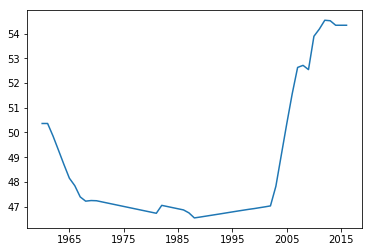

In [12]:
plt.plot(ts)

C:\Users\sup33\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\sup33\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\sup33\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


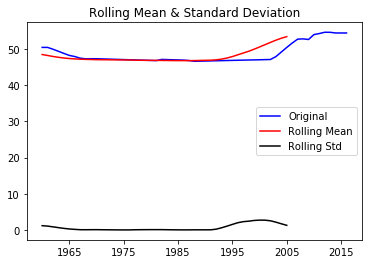

Results of Dickey-Fuller Test:
Test Statistic                 -5.316516
p-value                         0.000005
#Lags Used                      8.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts)

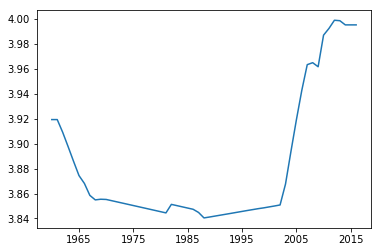

In [14]:
ts_log = np.log(ts)
plt.plot(ts_log)

C:\Users\sup33\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=56,center=False).mean()
  """Entry point for launching an IPython kernel.


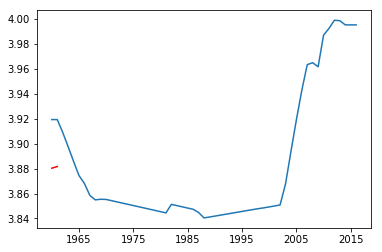

In [15]:
moving_avg = pd.rolling_mean(ts_log,56)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [25]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(56)

Year
2016-01-01         NaN
2015-01-01         NaN
2014-01-01         NaN
2013-01-01         NaN
2012-01-01         NaN
2011-01-01         NaN
2010-01-01         NaN
2009-01-01         NaN
2008-01-01         NaN
2007-01-01         NaN
2006-01-01         NaN
2005-01-01         NaN
2004-01-01         NaN
2003-01-01         NaN
2002-01-01         NaN
2001-01-01         NaN
2000-01-01         NaN
1999-01-01         NaN
1998-01-01         NaN
1997-01-01         NaN
1996-01-01         NaN
1995-01-01         NaN
1994-01-01         NaN
1993-01-01         NaN
1992-01-01         NaN
1991-01-01         NaN
1990-01-01         NaN
1989-01-01         NaN
1988-01-01         NaN
1987-01-01         NaN
1986-01-01         NaN
1985-01-01         NaN
1984-01-01         NaN
1983-01-01         NaN
1982-01-01         NaN
1981-01-01         NaN
1980-01-01         NaN
1979-01-01         NaN
1978-01-01         NaN
1977-01-01         NaN
1976-01-01         NaN
1975-01-01         NaN
1974-01-01         NaN
1973-0

C:\Users\sup33\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\sup33\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


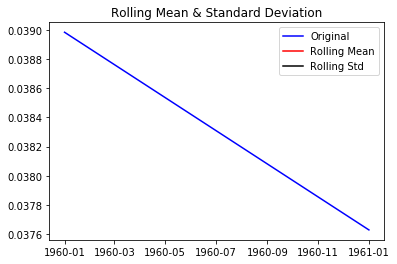

Results of Dickey-Fuller Test:


ValueError: maxlag should be < nobs

In [65]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

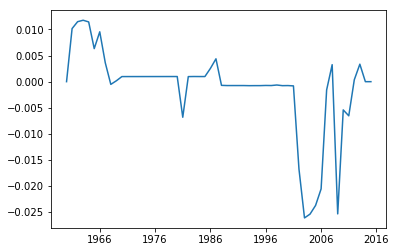

In [66]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\sup33\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\sup33\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


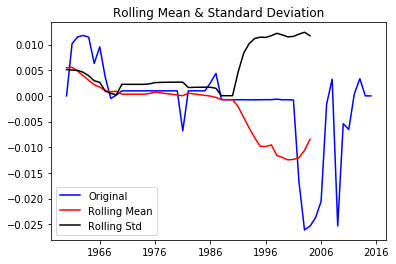

Results of Dickey-Fuller Test:
Test Statistic                 -1.561113
p-value                         0.503093
#Lags Used                      5.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [69]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [27]:
from statsmodels.tsa.stattools import acf, pacf

In [28]:
lag_acf = acf(ts, nlags=20)
lag_pacf = pacf(ts, nlags=20, method='ols')

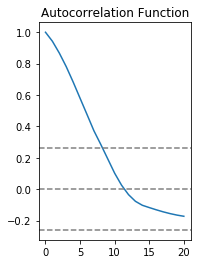

In [29]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

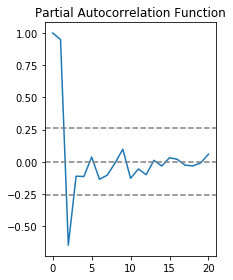

In [30]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

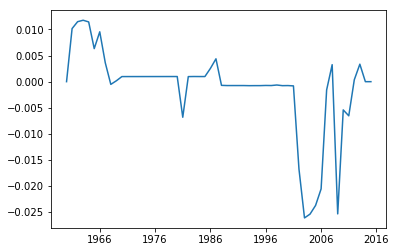

In [67]:
ts_diff = ts - ts.shift()
plt.plot(ts_log_diff)

[ 50.41601559  50.43478693  50.43931073  50.43079457  50.41272432
  50.38756277  50.35739111]


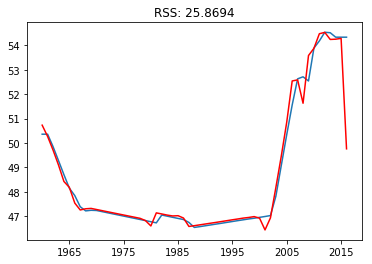

In [74]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts , order=(3, 0, 0))  
results_AR = model.fit(disp=-1)  
print(results_AR.forecast(steps=7)[0])
plt.plot(ts)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts)**2))

In [81]:
def AR_Model(ts):
    model = ARIMA(ts, order=(2, 0, 0))
    results_AR = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2, 0, 0))',results_AR)
    print('Lag: %s' % results_AR.k_ar)
    print('Coefficients: %s' % results_AR.params)
    #print(results_AR.summary())
    predict_MA_HPI = np.exp(results_AR.predict(10, 15, dynamic=True))
    print(predict_MA_HPI)
    plt.plot(ts_log)
    plt.plot(results_AR.fittedvalues, color='red')
    #print(np.exp(results_AR.fittedvalues))
    print(results_AR.aic)
    return results_AR

AR_Model(ts)

NameError: name 'cal_aic_metric' is not defined

In [80]:
def MA_Model(ts):
    model = ARIMA(ts, order=(0, 0, 7))  
    results_MA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(0, 0, 7))',results_MA)
    print('Lag: %s' % results_MA.k_ar)
    print('Coefficients: %s' % results_MA.params)
    print(results_MA.summary())
    plt.plot(ts)
    plt.plot(results_MA.fittedvalues, color='red')
    return results_MA

MA_Model(ts)

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [ ]:
    def Combined_Model(ts):
    model = ARIMA(ts, order=(2, 0, 4))  
    results_ARIMA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2,0, 4))',results_ARIMA)
    print('Lag: %s' % results_ARIMA.k_ar)
    print('Coefficients: %s' % results_ARIMA.params)
    print(results_ARIMA.summary())
    plt.plot(ts)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    return results_ARIMA

In [110]:
indicator_data = pd.read_csv('Indicators_Cleaned.csv',names = ['CountryName', 'CountryCode', 'IndicatorCode', 'Value', 'Value_Description','Year'])
argentina_df_ind1 = indicator_data[(indicator_data['IndicatorCode'].isin(['AG.LND.AGRI.ZS'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind1.head(20)
list(argentina_df_ind1)
#argentina_df_ind1['Year'] = pd.to_datetime(argentina_df_ind1['Year'])
argentina_df_ind1['Year']=[d.split('-')[0] for d in argentina_df_ind1.Year]
#argentina_df_ind1['Year'].argentina_df_ind1.year
#argentina_df_ind1['Year'] = argentina_df_ind1['Year'].year,

In [111]:
argentina_df_ind1.head(20)

,CountryName,CountryCode,IndicatorCode,Value,Value_Description,Year
1,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2016
2,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2015
3,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2014
4,Argentina,AR,AG.LND.AGRI.ZS,54.5180491761946,Agricultural land (% of land area),2013
5,Argentina,AR,AG.LND.AGRI.ZS,54.53814644698521,Agricultural land (% of land area),2012
6,Argentina,AR,AG.LND.AGRI.ZS,54.18260745645289,Agricultural land (% of land area),2011
7,Argentina,AR,AG.LND.AGRI.ZS,53.8902835176801,Agricultural land (% of land area),2010
8,Argentina,AR,AG.LND.AGRI.ZS,52.54230475501429,Agricultural land (% of land area),2009
9,Argentina,AR,AG.LND.AGRI.ZS,52.713679664119795,Agricultural land (% of land area),2008
10,Argentina,AR,AG.LND.AGRI.ZS,52.6303673415696,Agricultural land (% of land area),2007


In [112]:
del argentina_df_ind1['Value_Description']
del argentina_df_ind1['CountryCode']
del argentina_df_ind1['CountryName']
del argentina_df_ind1['IndicatorCode']

In [45]:
argentina_df_ind1.head()

,CountryName,CountryCode,IndicatorCode,Value,Value_Description,Year,GDP
1,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2016-01-01,NaN
2,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2015-01-01,NaN
3,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2014-01-01,NaN
4,Argentina,AR,AG.LND.AGRI.ZS,54.5180491761946,Agricultural land (% of land area),2013-01-01,NaN
5,Argentina,AR,AG.LND.AGRI.ZS,54.53814644698521,Agricultural land (% of land area),2012-01-01,NaN


In [126]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression(fit_intercept=True)
feature = argentina_df_ind1.Year.reshape((57,1))
label = argentina_df_ind1.Value
regr.fit(feature, label )

C:\Users\sup33\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
pred=regr.predict(2000)
pred

array([ 49.66730406])

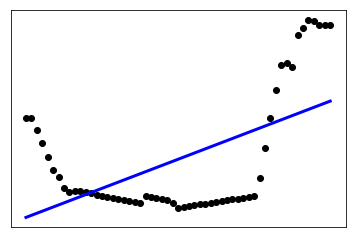

In [128]:
plt.scatter(feature, label,  color='black')
plt.plot(feature, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [68]:
from sklearn.cluster import KMeans
indicator_data = pd.read_csv('Indicators_Cleaned.csv',names = ['CountryName', 'CountryCode', 'IndicatorCode', 'Value', 'Value_Description','Year'])
indicator_data= indicator_data.ix[1:]
indicator_data.head()


C:\Users\sup33\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


,CountryName,CountryCode,IndicatorCode,Value,Value_Description,Year
1,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2016-01-01
2,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2015-01-01
3,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2014-01-01
4,Argentina,AR,AG.LND.AGRI.ZS,54.5180491761946,Agricultural land (% of land area),2013-01-01
5,Argentina,AR,AG.LND.AGRI.ZS,54.53814644698521,Agricultural land (% of land area),2012-01-01


In [86]:
argentina_df_ind1 = indicator_data[(indicator_data['IndicatorCode']=='AG.LND.AGRI.ZS' )& \
                      (indicator_data['CountryCode'] == 'AR')]

argentina_df_GDP = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.CD'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind1.head()

,CountryName,CountryCode,IndicatorCode,Value,Value_Description,Year
1,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2016-01-01
2,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2015-01-01
3,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2014-01-01
4,Argentina,AR,AG.LND.AGRI.ZS,54.5180491761946,Agricultural land (% of land area),2013-01-01
5,Argentina,AR,AG.LND.AGRI.ZS,54.53814644698521,Agricultural land (% of land area),2012-01-01


In [70]:
argentina_df_GDP.head()

,CountryName,CountryCode,IndicatorCode,Value,Value_Description,Year
229,Argentina,AR,NY.GDP.MKTP.CD,545866164478.053,GDP (current US$),2016-01-01
230,Argentina,AR,NY.GDP.MKTP.CD,584711485367.2671,GDP (current US$),2015-01-01
231,Argentina,AR,NY.GDP.MKTP.CD,526319673731.63794,GDP (current US$),2014-01-01
232,Argentina,AR,NY.GDP.MKTP.CD,552025140252.246,GDP (current US$),2013-01-01
233,Argentina,AR,NY.GDP.MKTP.CD,545982375701.128,GDP (current US$),2012-01-01


In [71]:

del argentina_df_GDP['CountryCode']
del argentina_df_GDP['CountryName']
del argentina_df_GDP['Value_Description']
del argentina_df_GDP['IndicatorCode']
argentina_df_GDP=argentina_df_GDP.rename(columns = {'Value':'GDP'})
argentina_df_GDP.head()

,GDP,Year
229,545866164478.053,2016-01-01
230,584711485367.2671,2015-01-01
231,526319673731.63794,2014-01-01
232,552025140252.246,2013-01-01
233,545982375701.128,2012-01-01


In [72]:
argentina_df_ind1=argentina_df_ind1.merge(argentina_df_GDP,on=['Year'], how= 'inner')
argentina_df_ind1.head()
#argentina_df_ind1['Value'].corr[argentina_df_ind1['GDP']]

,CountryName,CountryCode,IndicatorCode,Value,Value_Description,Year,GDP
0,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2016-01-01,545866164478.053
1,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2015-01-01,584711485367.2671
2,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2014-01-01,526319673731.63794
3,Argentina,AR,AG.LND.AGRI.ZS,54.5180491761946,Agricultural land (% of land area),2013-01-01,552025140252.246
4,Argentina,AR,AG.LND.AGRI.ZS,54.53814644698521,Agricultural land (% of land area),2012-01-01,545982375701.128


In [76]:
argentina_df_ind1[['Value','GDP']] = argentina_df_ind1[['Value','GDP']].apply(pd.to_numeric)
argentina_df_ind1['Value'].corr(argentina_df_ind1['GDP'])

0.73350375426735537

In [112]:
from sklearn.cluster import KMeans
import math
data=[]                            
indicator_data = pd.read_csv('Indicators_Cleaned.csv',names = ['CountryName', 'CountryCode', 'IndicatorCode', 'Value', 'Value_Description','Year'])
indicator_data= indicator_data.ix[1:]
# Get the codes of the all countries
cc = indicator_data.CountryCode.unique()
print(cc)
for code in cc:
    #Get all the indicators in the data
    indicators = indicator_data.IndicatorCode.unique()
    #For all contries and indicators, calculate the correlation of the indicators with the GDP of country
    for ind in indicators:
        #Filter the data of the country with given indicator 
        argentina_df_ind1 = indicator_data[(indicator_data['IndicatorCode'].isin([ind])) & \
                      (indicator_data['CountryCode'] == code)]

        argentina_df_GDP = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.CD'])) & \
                      (indicator_data['CountryCode'] == code)]
        
        del argentina_df_GDP['CountryCode']
        del argentina_df_GDP['CountryName']
        del argentina_df_GDP['Value_Description']
        del argentina_df_GDP['IndicatorCode']
        argentina_df_GDP=argentina_df_GDP.rename(columns = {'Value':'GDP'})
        argentina_df_ind1=argentina_df_ind1.merge(argentina_df_GDP,on=['Year'], how= 'inner')
        argentina_df_ind1[['Value','GDP']] = argentina_df_ind1[['Value','GDP']].apply(pd.to_numeric)
        corr=math.fabs(argentina_df_ind1['Value'].corr(argentina_df_ind1['GDP']))
        data.append([code,ind, corr])
df = pd.DataFrame(data, columns=['CountryName','IndicatorCode','affect'])
           

C:\Users\sup33\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


['AR' 'BR' 'EC' 'IN' 'LY' 'ZA']
AR
BR
EC
IN
LY
ZA


In [114]:
df = pd.get_dummies(df,columns=['CountryName'])
df = pd.get_dummies(df,columns=['IndicatorCode'])
df.head()

,affect,CountryName_AR,CountryName_BR,CountryName_EC,CountryName_IN,CountryName_LY,CountryName_ZA,IndicatorCode_AG.LND.AGRI.ZS,IndicatorCode_FI.RES.TOTL.CD,IndicatorCode_NE.EXP.GNFS.ZS,IndicatorCode_NE.TRD.GNFS.ZS,IndicatorCode_NY.GDP.MKTP.CD,IndicatorCode_NY.GDP.MKTP.KD.ZG,IndicatorCode_SP.DYN.CBRT.IN,IndicatorCode_SP.POP.DPND,IndicatorCode_SP.POP.GROW
0,0.733504,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.856211,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.176310,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.455815,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [115]:
from sklearn.cluster import KMeans
#Create a clustering from the processed data
kmeans = KMeans(n_clusters=3, random_state=0).fit(df.values)

In [116]:
kmeans.cluster_centers_

array([[  7.74635543e-01,   1.66666667e-01,   3.00000000e-01,
          0.00000000e+00,   3.00000000e-01,   0.00000000e+00,
          2.33333333e-01,   1.33333333e-01,   1.33333333e-01,
          6.66666667e-02,   1.00000000e-01,   1.33333333e-01,
          6.66666667e-02,   1.33333333e-01,   1.00000000e-01,
          1.33333333e-01],
       [  4.19936996e-01,   2.66666667e-01,   2.77555756e-17,
          2.77555756e-17,   2.77555756e-17,   6.00000000e-01,
          1.33333333e-01,   6.66666667e-02,   6.66666667e-02,
          2.00000000e-01,   1.33333333e-01,   6.66666667e-02,
          2.00000000e-01,   6.66666667e-02,   1.33333333e-01,
          6.66666667e-02],
       [  7.06243878e-01,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.11111111e-01,   1.11111111e-01,
          1.11111111e-01,   1.11111111e-01,   1.11111111e-01,
          1.11111111e-01,   1.11111111e-01,   1.11111111e-01,
          1.1111

In [152]:
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value_Description,Year
1,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2016-01-01
2,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2015-01-01
3,Argentina,AR,AG.LND.AGRI.ZS,54.3357121193851,Agricultural land (% of land area),2014-01-01
4,Argentina,AR,AG.LND.AGRI.ZS,54.5180491761946,Agricultural land (% of land area),2013-01-01
5,Argentina,AR,AG.LND.AGRI.ZS,54.53814644698521,Agricultural land (% of land area),2012-01-01


In [170]:
def predict(code,ind,year):
        #filterout the country, indicator for the given year
        argentina_df_ind1 = indicator_data[(indicator_data['IndicatorCode'].isin([ind])) & \
                      (indicator_data['CountryCode'] == code)]

        argentina_df_GDP = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.CD'])) & \
                      (indicator_data['CountryCode'] == code) ]
        del argentina_df_GDP['CountryCode']
        del argentina_df_GDP['CountryName']
        del argentina_df_GDP['Value_Description']
        del argentina_df_GDP['IndicatorCode']
        #Create another dataframe for GDP
        argentina_df_GDP=argentina_df_GDP.rename(columns = {'Value':'GDP'})
        argentina_df_ind1=argentina_df_ind1.merge(argentina_df_GDP,on=['Year'], how= 'inner')
        argentina_df_ind1[['Value','GDP']] = argentina_df_ind1[['Value','GDP']].apply(pd.to_numeric)
        corr=math.fabs(argentina_df_ind1['Value'].corr(argentina_df_ind1['GDP']))
        data.append([code,ind, corr])
        df = pd.DataFrame(data, columns=['CountryName','IndicatorCode','affect'])
        df = pd.get_dummies(df,columns=['CountryName'])
        df = pd.get_dummies(df,columns=['IndicatorCode'])
        #Check to which cluster this data belong to
        pred = kmeans.predict(df.values[0][:-1])
        if pred[0] == 0:
            return "For "+str(code)+" country the indicator: "+str(ind)+" strongly affects GDP"
        else:
            return "For "+str(code)+" country the indicator: "+str(ind)+" does not affects GDP strongly"

In [171]:
predict('AR','AG.LND.AGRI.ZS',"2000-01-01")

C:\Users\sup33\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


'For AR country the indicator: AG.LND.AGRI.ZS strongly affects GDP'